In [40]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



In [65]:
sd = pd.read_csv('healthcare-dataset-stroke-data.csv')
sd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Preprocesado

In [66]:
sd.shape

(5110, 12)

In [67]:
sd.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [68]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [69]:
sd.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [70]:
sd.groupby(['gender','Residence_type']).size()

gender  Residence_type
Female  Rural             1465
        Urban             1529
Male    Rural             1048
        Urban             1067
Other   Rural                1
dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


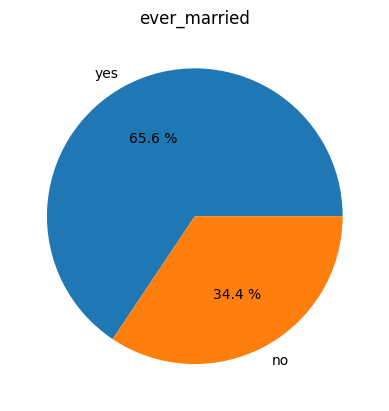

In [47]:
plt.pie(sd.ever_married.value_counts(),labels=['yes', 'no'], autopct="%0.1f %%")
plt.title('ever_married')
print(sd['ever_married'].value_counts())

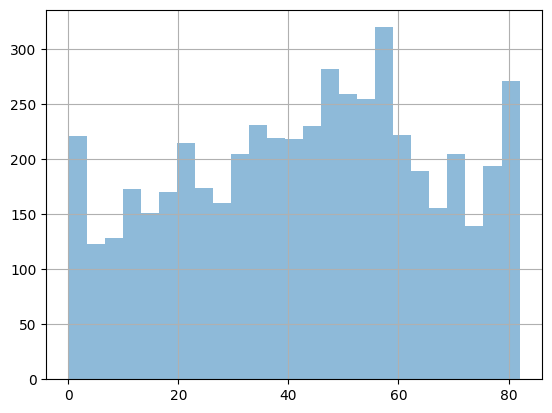

In [48]:
grafico_age=sd['age'].hist(alpha=0.5,bins=25)

In [71]:
#replacing the missing values with the most frequent value
#sd['bmi'].fillna(sd['bmi'].mode()[0], inplace=True)
sd['bmi'] = sd['bmi'].fillna(sd['bmi'].mode()[0])


#### Reemplazando valores

In [72]:

'''sd['ever_married'] = sd['ever_married'].replace({'Yes': 0, 'No': 1})
sd['gender'] = sd['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
sd['Residence_type'] = sd['Residence_type'].replace({'Urban': 0, 'Rural': 1})
sd['smoking_status'] = sd['smoking_status'].replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})
sd['work_type'] = sd['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4})'''

pd.set_option('future.no_silent_downcasting', True)

sd['ever_married'] = sd['ever_married'].replace({'Yes': 0, 'No': 1})
sd['gender'] = sd['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
sd['Residence_type'] = sd['Residence_type'].replace({'Urban': 0, 'Rural': 1})
sd['smoking_status'] = sd['smoking_status'].replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})
sd['work_type'] = sd['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4})




In [73]:
sd = sd.drop(('id'), axis=1)

In [61]:
#sd = sd.drop(sd.columns[0], axis=1)

## Análisis exploratorio de datos

Buscando la correlación entre las variables

,stroke
stroke,1.000000
age,0.245257
heart_disease,0.134914
avg_glucose_level,0.131945
hypertension,0.127904
bmi,0.038257
gender,-0.009200
Residence_type,-0.015458
work_type,-0.032098
smoking_status,-0.066393


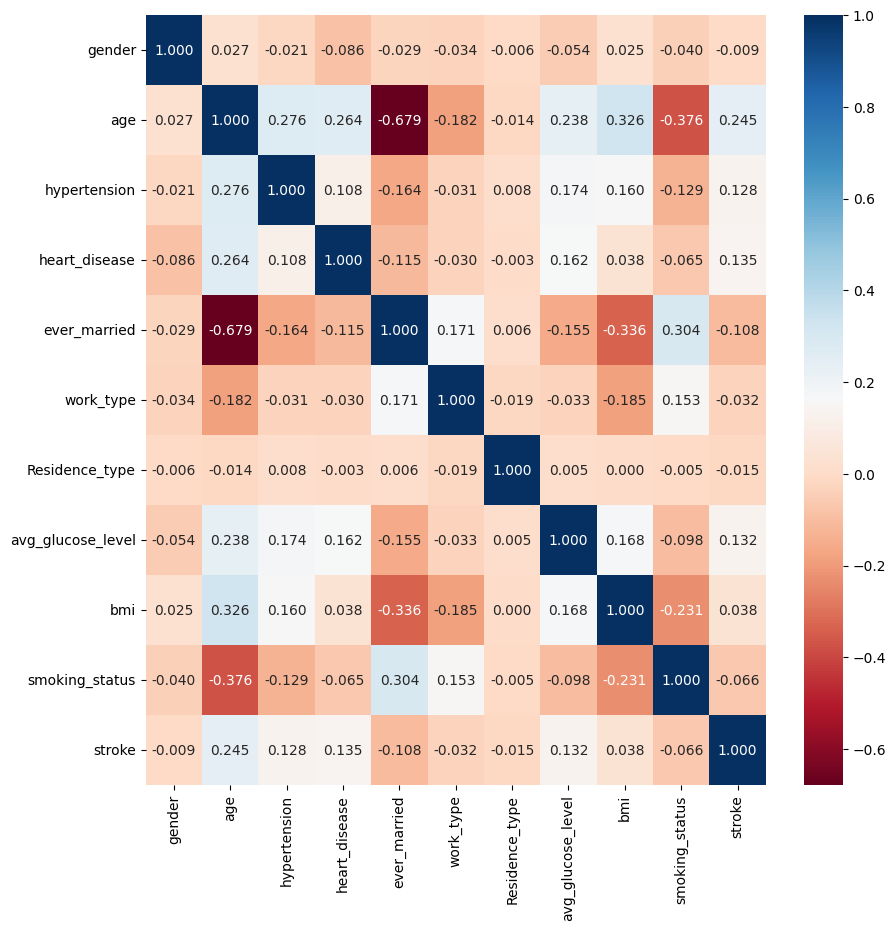

In [74]:
corr = sd.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".3f")
corr[['stroke']].sort_values(by = 'stroke',ascending = False)


In [75]:
sd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,1,61.0,0,0,0,1,1,202.21,28.7,1,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1


In [64]:
# Normalización 
sd.avg_glucose_level=(sd.avg_glucose_level-min(sd.avg_glucose_level))/(max(sd.avg_glucose_level)-min(sd.avg_glucose_level))
sd.age=(sd.age-min(sd.age))/(max(sd.age)-min(sd.age))
sd.bmi=(sd.bmi-min(sd.bmi))/(max(sd.bmi)-min(sd.bmi))
sd.head(5)

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.816895,0,1,0,0,0,0.801265,0.301260,0,1
1,0.743652,0,0,0,1,1,0.679023,0.210767,1,1
2,0.975586,0,1,0,0,1,0.234512,0.254296,1,1
3,0.597168,0,0,0,0,0,0.536008,0.276060,2,1
4,0.963379,1,0,0,1,1,0.549349,0.156930,1,1


In [88]:
variables_eliminar2 = ['ever_married','work_type','Residence_type']               
sd = sd.drop(variables_eliminar2, axis=1)

## Vizualización de datos

ValueError: Could not interpret value `ever_married` for `x`. An entry with this name does not appear in `data`.

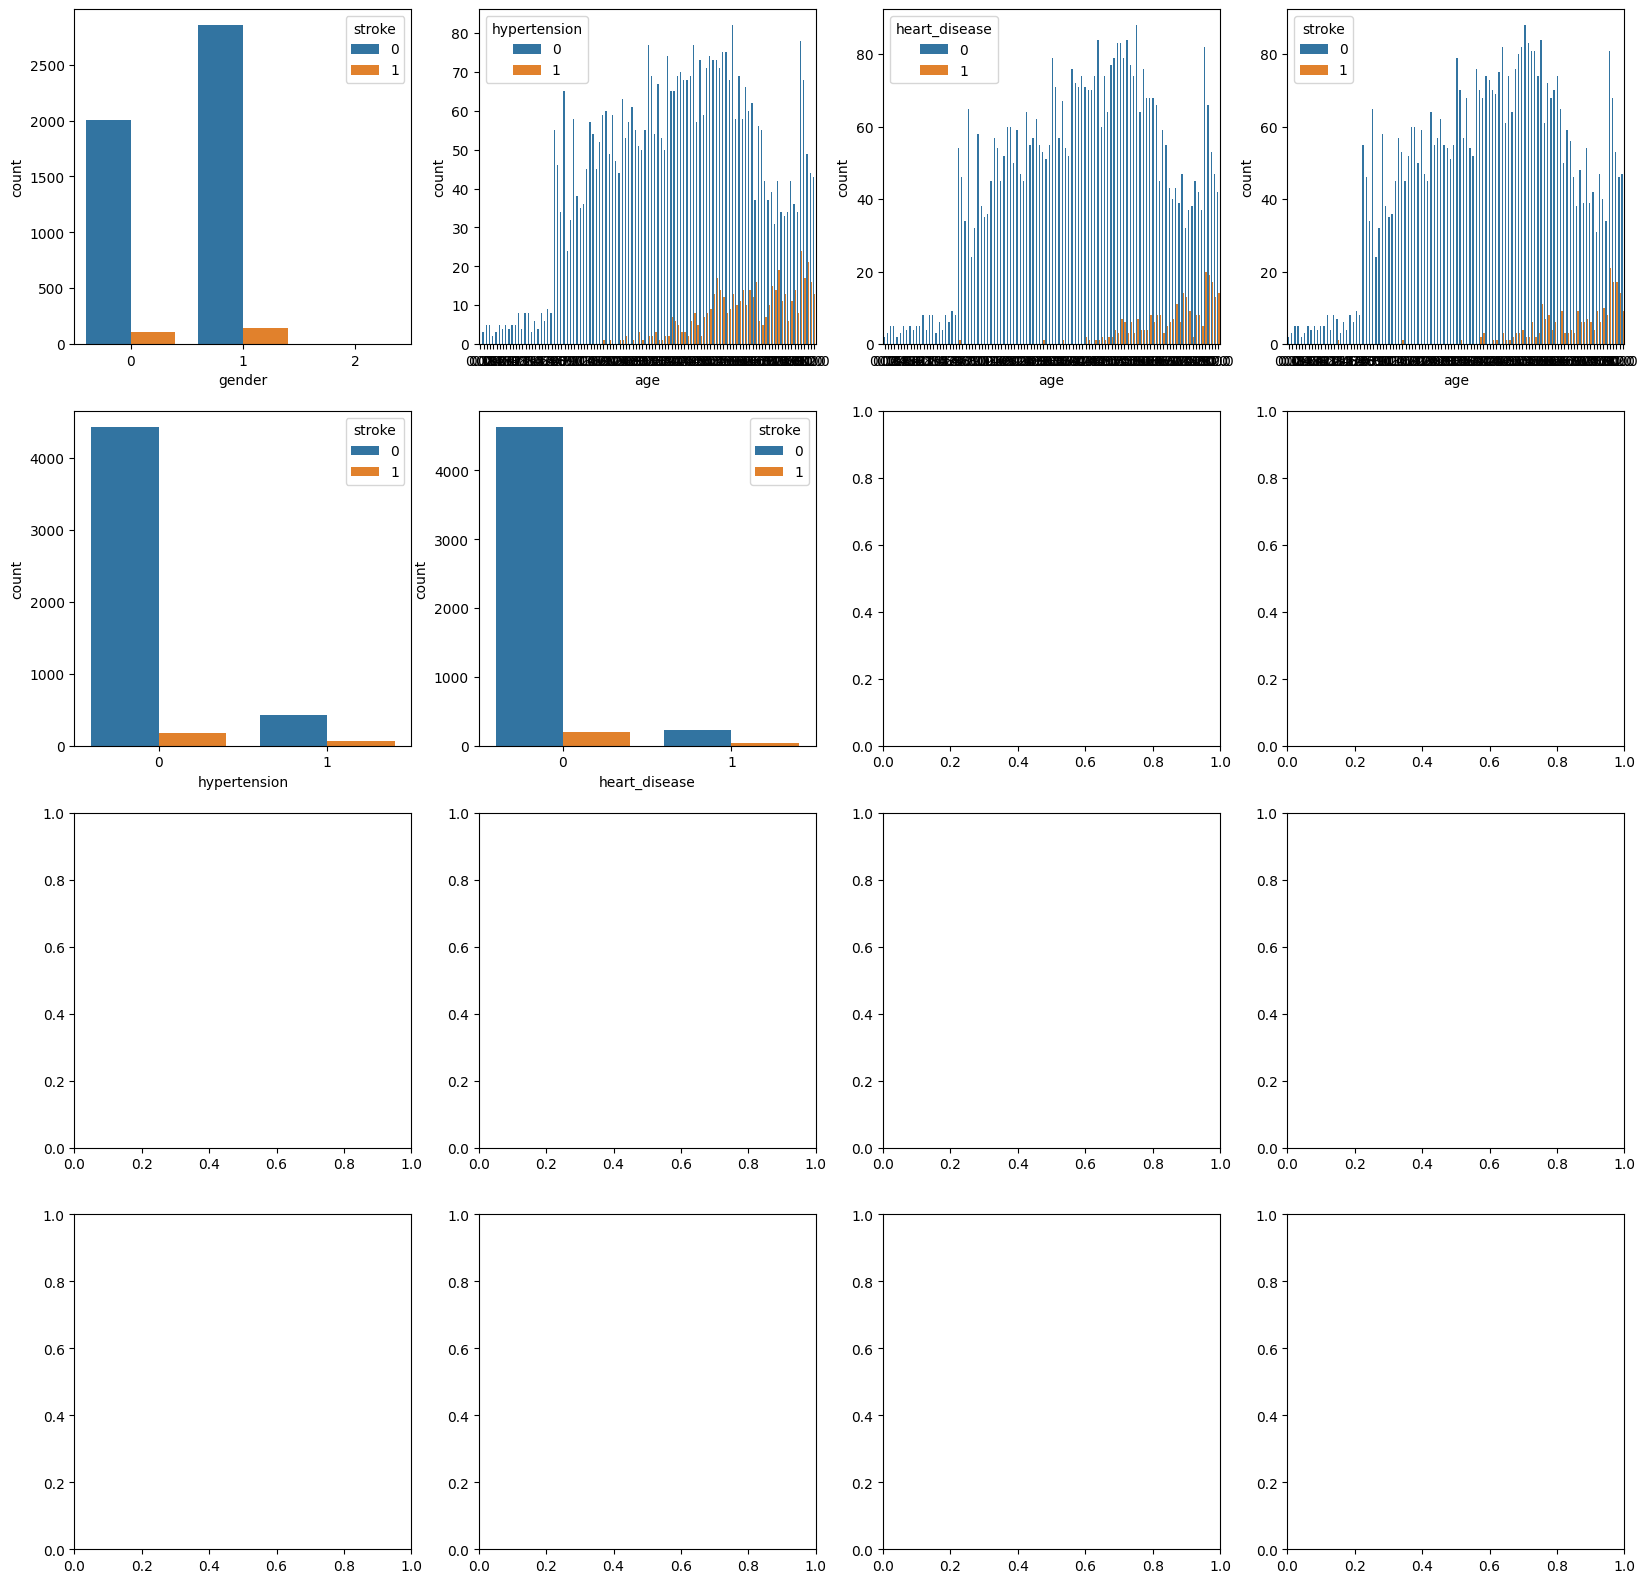

In [89]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = sd,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = sd,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = sd,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = sd,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = sd,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = sd,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = sd,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = sd,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = sd,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = sd,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = sd,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = sd,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = sd,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = sd,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = sd,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = sd,hue = 'smoking_status', ax=ax[3,3])

## Entrenamiento

In [90]:
X_train, X_test, y_train, y_test = train_test_split(sd.drop('stroke', axis=1), sd['stroke'], test_size=0.2, random_state=42)

## Entrenamiento de modelos

In [91]:
X_test.head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
4688,0,31.0,0,0,64.85,23.0,3
4478,0,40.0,0,0,65.29,28.3,1
3849,1,8.0,0,0,74.42,22.5,3
4355,1,79.0,1,0,76.64,19.5,1
3826,1,75.0,0,0,94.77,27.2,1


### Logistic Regression

In [92]:
lr = LogisticRegression()
lr

LogisticRegression()

In [93]:
#training the model
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\carlos\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9393346379647749

In [94]:
#testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9393346379647749

### Support Vector Machine (SVM)

In [95]:
svm = SVC()
svm

SVC()

In [96]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9393346379647749

In [97]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9393346379647749

### Decision Tree Classifier

In [98]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [99]:
#training the model
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9256360078277887

In [100]:
#testing the model
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9256360078277887

### K-Nearest Neighbors (KNN)

In [101]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [102]:
#training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9354207436399217

In [29]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9373776908023483

## Model Evaluation

### Logistic Regression and Confusion Matrix

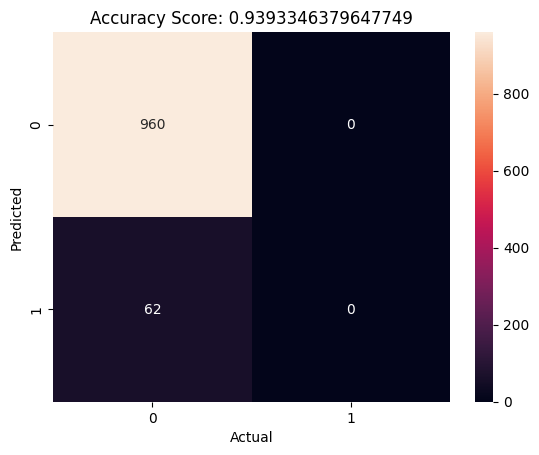

In [103]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [104]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ',metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model log loss: ',log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9393346379647749
Logistic Regression Model F1 score:  0.0
Logistic Regression Model Mean Absolute Error:  0.060665362035225046
Logistic Regression Model Mean Squared Error:  0.060665362035225046
Logistic Regression Model log loss:  2.1866012819229583


### Support Vector Machine and Confusion Matrix 

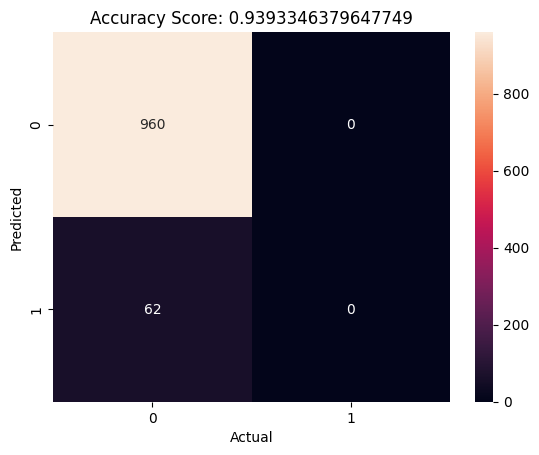

In [105]:
sns.heatmap(metrics.confusion_matrix(y_test, sv_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, sv_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [106]:
print('SVM Model Accuracy Score:',accuracy_score(y_test, sv_pred))
print('SVM Model F1 score: ',metrics.f1_score(y_test, sv_pred))
print('SVM Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, sv_pred))
print('SVM Model Mean Squared Error: ',metrics.mean_squared_error(y_test, sv_pred))
print('SVM Model log loss: ',log_loss(y_test, sv_pred))

SVM Model Accuracy Score: 0.9393346379647749
SVM Model F1 score:  0.0
SVM Model Mean Absolute Error:  0.060665362035225046
SVM Model Mean Squared Error:  0.060665362035225046
SVM Model log loss:  2.1866012819229583


### Decision Tree Classifier and Confusion Matrix

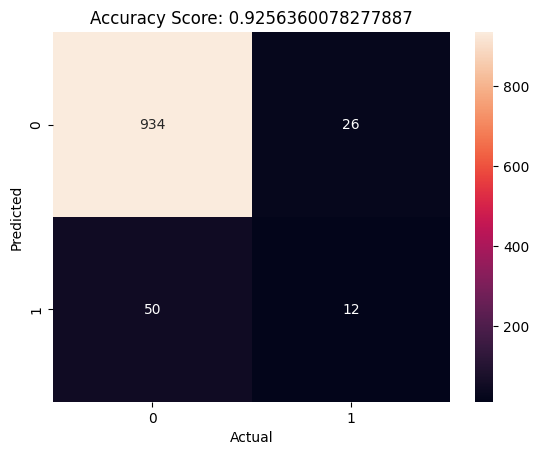

In [107]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, dt_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [108]:
print('Decision Tree Model Accuracy Score:',accuracy_score(y_test, dt_pred))
print('Decision Tree Model F1 score: ',metrics.f1_score(y_test, dt_pred))
print('Decision Tree Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error: ',metrics.mean_squared_error(y_test, dt_pred))
print('Decision Tree Model log loss: ',log_loss(y_test, dt_pred))

Decision Tree Model Accuracy Score: 0.9256360078277887
Decision Tree Model F1 score:  0.24
Decision Tree Model Mean Absolute Error:  0.07436399217221135
Decision Tree Model Mean Squared Error:  0.07436399217221135
Decision Tree Model log loss:  2.6803499584862074


### K-Nearest Neighbors and Confusion Matrix

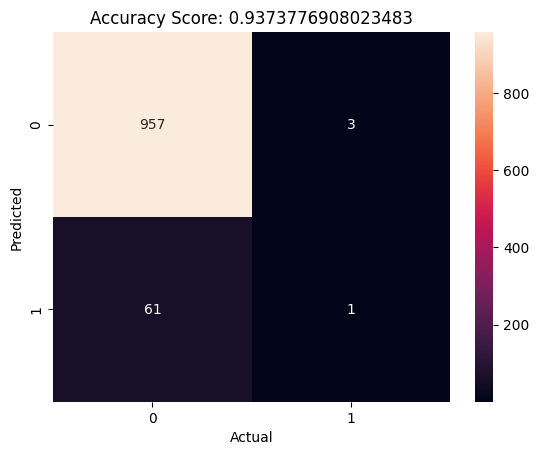

In [109]:
sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, knn_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [110]:
print('KNN Model Accuracy Score:',accuracy_score(y_test, knn_pred))
print('KNN Model F1 score: ',metrics.f1_score(y_test, knn_pred))
print('KNN Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, knn_pred))
print('KNN Model Mean Squared Error: ',metrics.mean_squared_error(y_test, knn_pred))
print('KNN Model log loss: ',log_loss(y_test, knn_pred))

KNN Model Accuracy Score: 0.9373776908023483
KNN Model F1 score:  0.030303030303030304
KNN Model Mean Absolute Error:  0.06262230919765166
KNN Model Mean Squared Error:  0.06262230919765166
KNN Model log loss:  2.2571368071462796


## Model Comparison

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


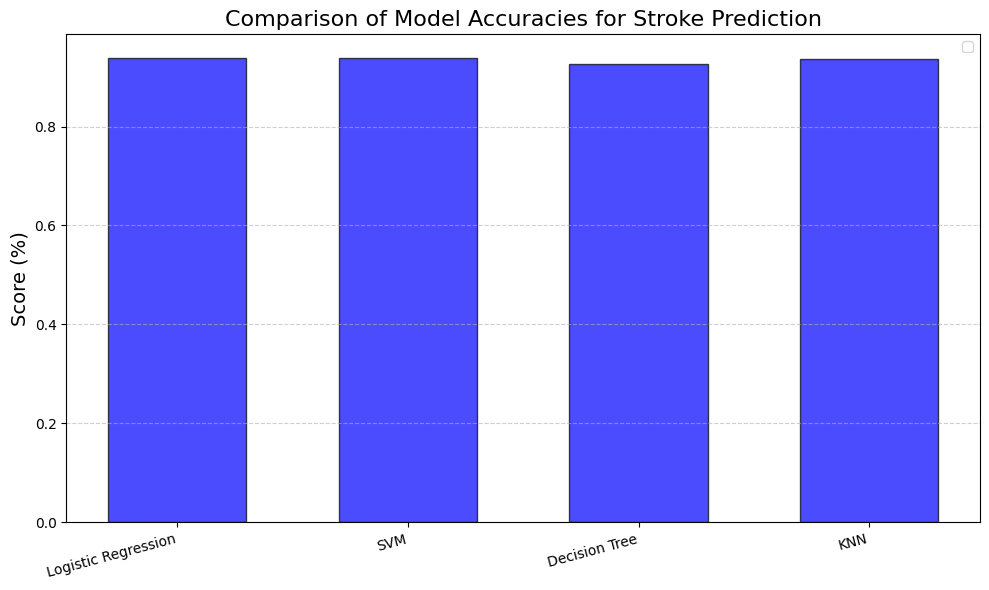

In [111]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'] 
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), 
            accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]  
plt.figure(figsize=(10, 6))  
plt.bar(models, accuracy, color='blue', width=0.6, alpha=0.7, edgecolor='k')  
plt.ylabel('Score (%)', fontsize=14)  
plt.title('Comparison of Model Accuracies for Stroke Prediction', fontsize=16)  
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.legend()  
plt.xticks(rotation=15, ha='right')  
plt.tight_layout() 
plt.show()

## Concluciones

El análisis de las gráficas revela que la edad, la hipertensión y la enfermedad cardíaca son factores de riesgo para sufrir un accidente cerebrovascular. Sin embargo, se observa una peculiaridad: las personas con menor probabilidad de hipertensión y enfermedad cardíaca tienen mayores posibilidades de sufrir un evento cerebrovascular. Además, los no fumadores tienen mayores probabilidades de sufrir un ataque cerebral que los fumadores. Por otro lado, las personas con un BMI entre 20 y 50 tienen mayores probabilidades de sufrir un derrame cerebral. Finalmente, otras características como el estado civil, el tipo de residencia y el tipo de trabajo también parecen tener un efecto sobre las posibilidades de sufrir un accidente cerebrovascular. 
